In [142]:
import requests

response = requests.get('https://api.coingecko.com/api/v3/coins/list')

data = response.json()
#or i in data:
#   if i['symbol']=='usdt':
#   	print(i)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests

# Crear una lista de símbolos, incluyendo USDT
symbols = [
    {'id': 'bitcoin', 'symbol': 'BTC'},
    {'id': 'ethereum', 'symbol': 'ETH'},
    {'id': 'binancecoin', 'symbol': 'BNB'},
    {'id': 'tether', 'symbol': 'USDT'},  
]

# Crear un DataFrame vacío para almacenar los datos
df = pd.DataFrame()

for symbol in symbols:
    symbol_id = symbol['id']
    symbol_name = symbol['symbol']
    print(symbol_name)
    # Realizar la solicitud a la API de CoinGecko
    response = requests.get(
        f'https://api.coingecko.com/api/v3/coins/{symbol_id}/market_chart',
        params={'vs_currency': 'usd', 'days': '200', 'interval': 'daily'}
    )
    
    data = response.json()
    # Extraer market_caps y dates
    market_caps = data['market_caps']
    prices = data['prices']
    
    # Convertir a DataFrame
    temp_dfmc = pd.DataFrame(market_caps, columns=['date', symbol_name+'_MC'])
    temp_dfpr = pd.DataFrame(prices, columns=['date', symbol_name+'_PRC'])
    
    # Convertir timestamps a date
    temp_dfmc['date'] = pd.to_datetime(temp_dfmc['date'], unit='ms').dt.date
    temp_dfpr['date'] = pd.to_datetime(temp_dfpr['date'], unit='ms').dt.date
    
    # Unir los datos al DataFrame principal
    if df.empty:
        df = temp_dfmc
        df = pd.merge(df, temp_dfpr, on='date', how='outer')
    else:
        df = pd.merge(df, temp_dfmc, on='date', how='outer')
        df = pd.merge(df, temp_dfpr, on='date', how='outer')
    
        


BTC
ETH
BNB
USDT


,date,BTC_MC,BTC_PRC,BTC_QTY,ETH_MC,ETH_PRC,ETH_QTY,BNB_MC,BNB_PRC,BNB_QTY,USDT_MC,USDT_PRC,USDT_QTY
0,2024-05-22,1.382275e+12,70189.835818,1.969339e+07,4.557655e+11,3792.486220,1.201759e+08,9.515877e+10,618.819257,1.537747e+08,1.113496e+11,0.998887,1.114736e+11
1,2024-05-23,1.362229e+12,69181.200857,1.969073e+07,4.496940e+11,3741.897741,1.201781e+08,9.455201e+10,614.719378,1.538133e+08,1.116920e+11,0.999778,1.117168e+11
2,2024-05-24,1.336347e+12,67906.465343,1.967924e+07,4.519341e+11,3766.398091,1.199911e+08,9.205832e+10,598.799141,1.537382e+08,1.117642e+11,0.999865,1.117793e+11
3,2024-05-25,1.350764e+12,68539.916466,1.970770e+07,4.476003e+11,3727.065982,1.200946e+08,9.236088e+10,600.023743,1.539287e+08,1.118037e+11,0.999534,1.118558e+11
4,2024-05-26,1.363998e+12,69268.445590,1.969147e+07,4.500386e+11,3750.077159,1.200078e+08,9.258461e+10,602.185290,1.537477e+08,1.118898e+11,0.999877,1.119036e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,2024-12-07,1.987080e+12,100346.019294,1.980228e+07,4.839719e+11,4018.353689,1.204404e+08,1.067613e+11,732.542429,1.457407e+08,1.379151e+11,1.001774,1.376709e+11
451,2024-12-07,1.987080e+12,100346.019294,1.980228e+07,4.839719e+11,4018.353689,1.204404e+08,1.067613e+11,731.320119,1.459843e+08,1.368547e+11,1.001763,1.366138e+11
452,2024-12-07,1.987080e+12,100346.019294,1.980228e+07,4.839719e+11,4018.353689,1.204404e+08,1.067613e+11,731.320119,1.459843e+08,1.368547e+11,1.001774,1.366123e+11
453,2024-12-07,1.987080e+12,100346.019294,1.980228e+07,4.839719e+11,4018.353689,1.204404e+08,1.067613e+11,731.320119,1.459843e+08,1.379151e+11,1.001763,1.376723e+11


In [152]:
df['total_MC'] = 0
for symbol in symbols:
    symbol_name = symbol['symbol']
    df['total_MC'] += df[symbol_name+'_MC']
# Ordenar el DataFrame por fecha
df = df.sort_values('date').reset_index(drop=True)

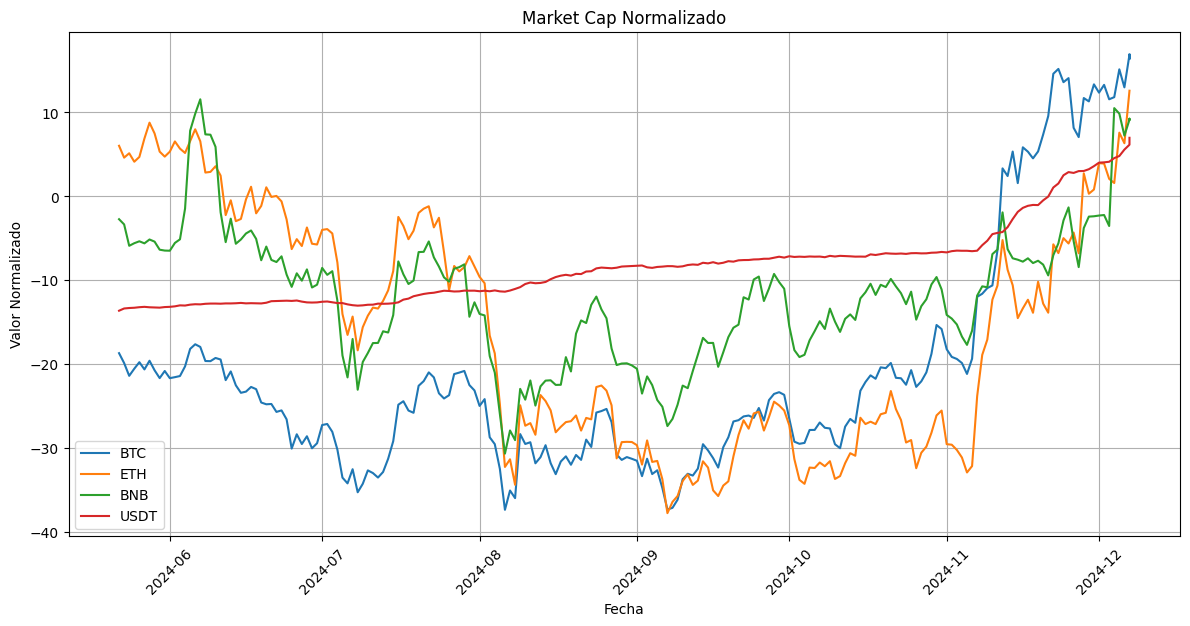

In [155]:
# Normalizar los datos 
normalized_df = df.copy()

for symbol in symbols:
    symbol_name = symbol['symbol']
    normalized_df[symbol_name+'_NRM'] = ((normalized_df[symbol_name+'_MC']/normalized_df[symbol_name+'_MC'].mean())-1)*100
    
# Graficar los datos normalizados
plt.figure(figsize=(12, 6))

for symbol in symbols:
    symbol_name = symbol['symbol']
    plt.plot(normalized_df['date'], normalized_df[symbol_name+'_NRM'], label=symbol_name)

# Configurar la gráfica
plt.title("Market Cap Normalizado")
plt.xlabel("Fecha")
plt.ylabel("Valor Normalizado")
plt.legend()
plt.grid()
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

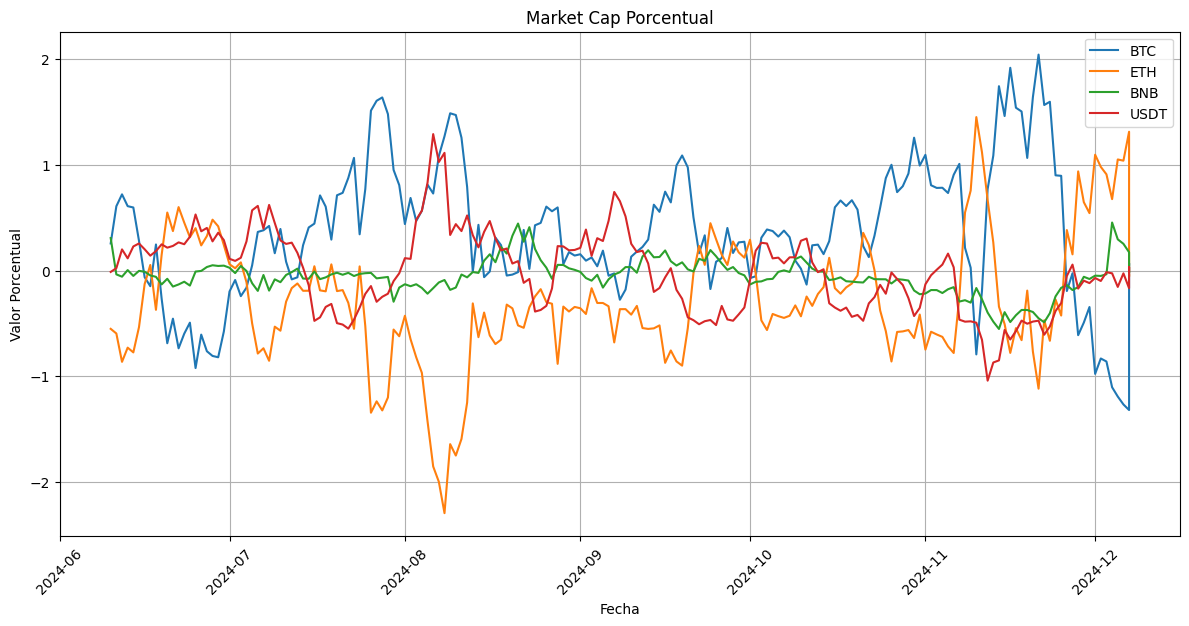

In [157]:
percent_df = df.copy()

for symbol in symbols:
    symbol_name = symbol['symbol']
    percent_df[symbol_name+'_PRCNT'] = (percent_df[symbol_name+'_MC']/percent_df['total_MC'])*100
    percent_df[symbol_name+'_PRCNT'] = percent_df[symbol_name+'_PRCNT'] - percent_df[symbol_name+'_PRCNT'].rolling(window=20).mean()
    
# Graficar los datos normalizados
plt.figure(figsize=(12, 6))

for symbol in symbols:
    symbol_name = symbol['symbol']
    plt.plot(normalized_df['date'], percent_df[symbol_name+'_PRCNT'], label=symbol_name)

# Configurar la gráfica
plt.title("Market Cap Porcentual")
plt.xlabel("Fecha")
plt.ylabel("Valor Porcentual")
plt.legend()
plt.grid()
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

In [160]:
df

,date,BTC_MC,BTC_PRC,BTC_QTY,ETH_MC,ETH_PRC,ETH_QTY,BNB_MC,BNB_PRC,BNB_QTY,USDT_MC,USDT_PRC,USDT_QTY,total_MC,BTC_QTY_OM,ETH_QTY_OM,BNB_QTY_OM,USDT_QTY_OM
0,2024-05-22,1.382275e+12,70189.835818,1.969339e+07,4.557655e+11,3792.486220,1.201759e+08,9.515877e+10,618.819257,1.537747e+08,1.113496e+11,0.998887,1.114736e+11,2.044549e+12,-80242.428211,-227133.749777,6.651125e+06,-1.730398e+10
1,2024-05-23,1.362229e+12,69181.200857,1.969073e+07,4.496940e+11,3741.897741,1.201781e+08,9.455201e+10,614.719378,1.538133e+08,1.116920e+11,0.999778,1.117168e+11,2.018167e+12,-82893.503636,-224996.360163,6.689686e+06,-1.706072e+10
2,2024-05-24,1.336347e+12,67906.465343,1.967924e+07,4.519341e+11,3766.398091,1.199911e+08,9.205832e+10,598.799141,1.537382e+08,1.117642e+11,0.999865,1.117793e+11,1.992104e+12,-94392.425113,-411989.135281,6.614615e+06,-1.699824e+10
3,2024-05-25,1.350764e+12,68539.916466,1.970770e+07,4.476003e+11,3727.065982,1.200946e+08,9.236088e+10,600.023743,1.539287e+08,1.118037e+11,0.999534,1.118558e+11,2.002529e+12,-65924.421010,-308496.431477,6.805095e+06,-1.692171e+10
4,2024-05-26,1.363998e+12,69268.445590,1.969147e+07,4.500386e+11,3750.077159,1.200078e+08,9.258461e+10,602.185290,1.537477e+08,1.118898e+11,0.999877,1.119036e+11,2.018511e+12,-82152.776614,-395231.502171,6.624107e+06,-1.687401e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,2024-12-07,1.978390e+12,100346.019294,1.971568e+07,4.834225e+11,4018.353689,1.203036e+08,1.067613e+11,732.542429,1.457407e+08,1.379151e+11,1.001763,1.376723e+11,2.706489e+12,-57947.919435,-99432.970981,-1.382887e+06,8.894785e+09
451,2024-12-07,1.978390e+12,100346.019294,1.971568e+07,4.834225e+11,4018.353689,1.203036e+08,1.067613e+11,732.542429,1.457407e+08,1.379151e+11,1.001774,1.376709e+11,2.706489e+12,-57947.919435,-99432.970981,-1.382887e+06,8.893330e+09
452,2024-12-07,1.978390e+12,100346.019294,1.971568e+07,4.834225e+11,4018.353689,1.203036e+08,1.067613e+11,731.320119,1.459843e+08,1.368547e+11,1.001763,1.366138e+11,2.705428e+12,-57947.919435,-99432.970981,-1.139299e+06,7.836227e+09
453,2024-12-07,1.978390e+12,100346.019294,1.971568e+07,4.839719e+11,4018.353689,1.204404e+08,1.067613e+11,731.320119,1.459843e+08,1.379151e+11,1.001763,1.376723e+11,2.707038e+12,-57947.919435,37296.006463,-1.139299e+06,8.894785e+09


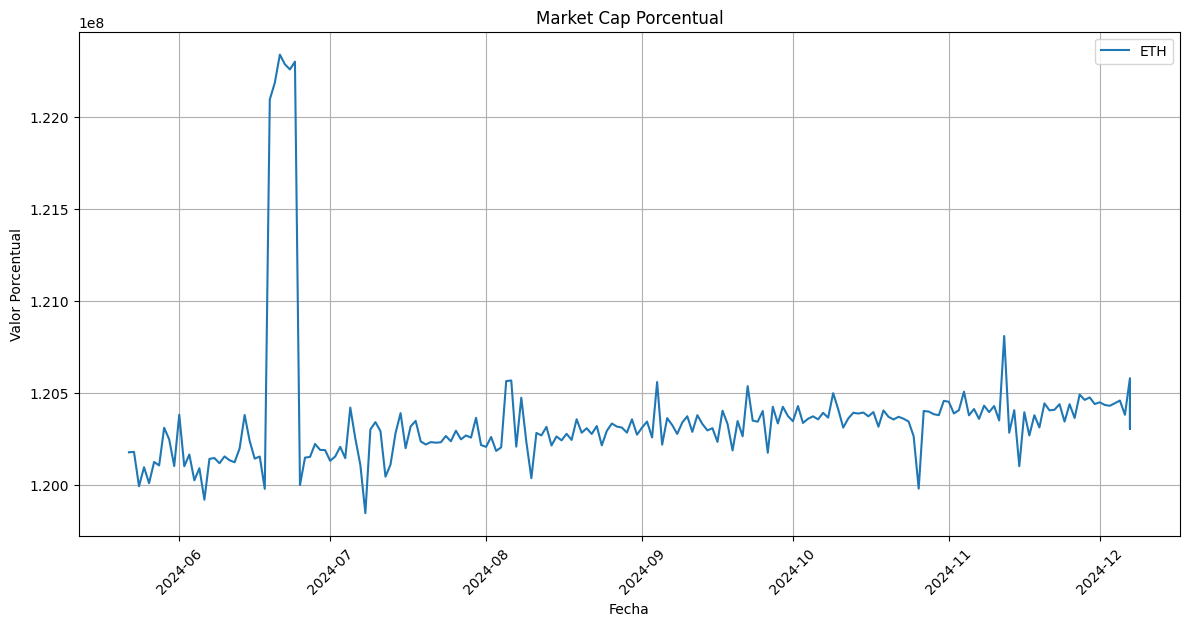

In [166]:
#Cantidad de unidades sobre la media (Over Media)
for symbol in symbols:
    symbol_name = symbol['symbol']
    df[symbol_name+'_QTY_OM'] = df[symbol_name+'_QTY']# - df[symbol_name+'_QTY'].mean()
    
# Graficar los datos normalizados
plt.figure(figsize=(12, 6))

#for symbol in symbols:
symbol_name = 'ETH'# symbol['symbol']
plt.plot(normalized_df['date'], df[symbol_name+'_QTY_OM'], label=symbol_name)

# Configurar la gráfica
plt.title("Market Cap Porcentual")
plt.xlabel("Fecha")
plt.ylabel("Valor Porcentual")
plt.legend()
plt.grid()
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()